## HomeWork - 3


# Task 1

## 1. Plot the velocity profile

#### The following script takes data from a pipe flow simulation and plot the laminar vs the turbulent flows as wells as other chracterstics related to the flow

In [372]:
#Load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

### Import flow data 
#### 2D pipe

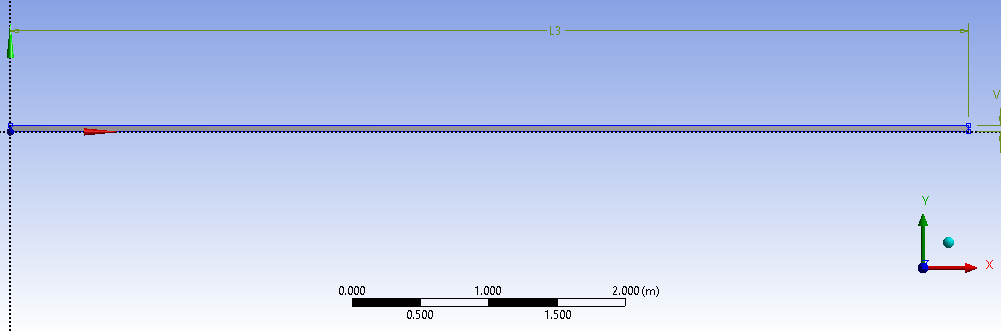

In [374]:
path="../images/Capture.PNG"
display(Image.open(path))

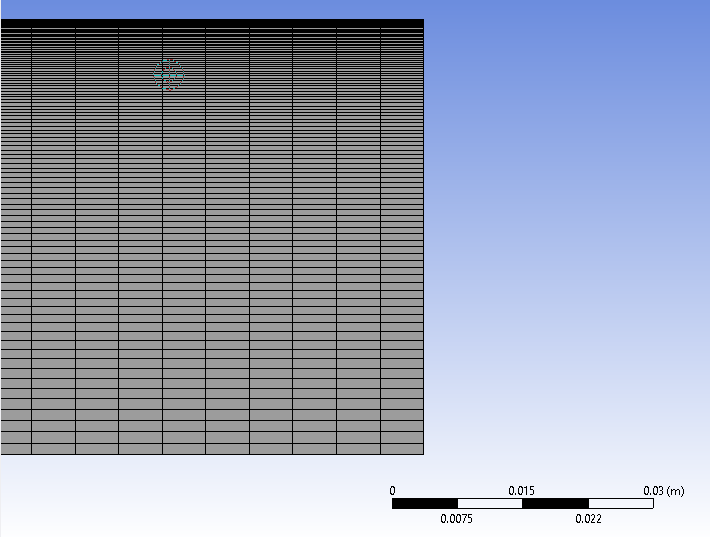

In [373]:
path="../images/zoomed section mesh.png"
display(Image.open(path))

In [350]:
data1 = np.loadtxt('../postProcessing/U_oulet',skiprows=4)
data11 = np.loadtxt('../postProcessing/U_velocity_laminar',skiprows=4)

#### 3D pipe

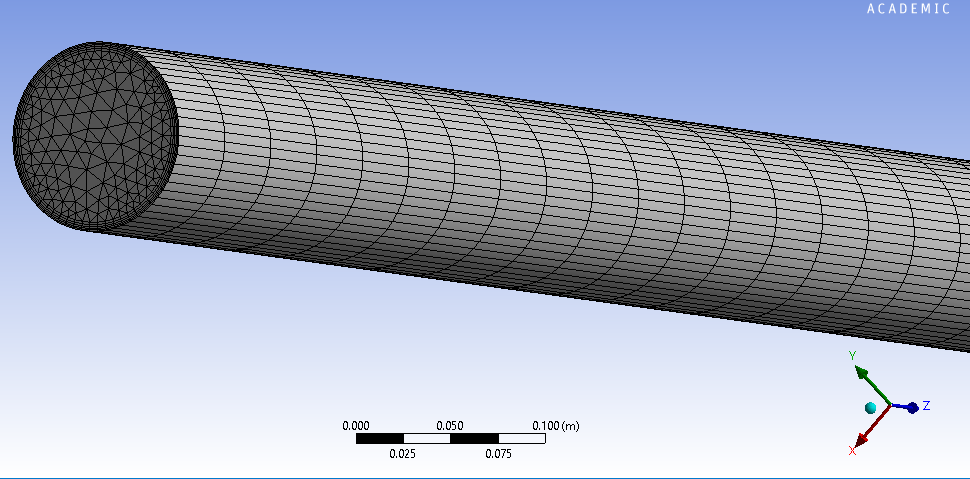

In [375]:
path="../images1/Capture3.PNG"
display(Image.open(path))

In [351]:
data31 = np.loadtxt('../postProcessing1/U_velocity',skiprows=4)

#### Considering symmetry of flow along the pipe center, convert the 2D simulation data to a 3D.

#### Laminar flow Re= 100

In [352]:
#laminar 
b= len(data11)
data22= data11[1:b,:]
full2  = np.zeros((2*len(data11)-1, 2))
data_11= np.flip(data11,0)
full2[0:101,:]= data_11
data22[:,0]=data22[:,0]*-1
full2[101:202]= data22

#### Turbulent flow, Re = 10,000  $Low_{Re} - {\kappa}{\omega} SST $  model

In [353]:
#Turbulent

b= len(data1)
data2= data1[1:b,:]
full  = np.zeros((2*len(data1)-1, 2))
data_1= np.flip(data1,0)
full[0:101,:]= data_1
data2[:,0]=data2[:,0]*-1
full[101:202]= data2


#### Construct the velocity profile for the the Hagen-Poiseuille solution:
<font size="5"> $u = \frac{G}{4 \mu}\left (R^2 - r^2  \right)$ </font>
    
where R is radius of pipe, r  distance from the center along the pipe radius, $G = \frac {d P}{L} $ , L is the pipe length. 

In [354]:
pressure_drop = np.loadtxt('../postProcessing/total_pressure',skiprows=4)
q = 0.05               # mass flow rate in kg/s
R= 0.05
r= full2[:,0]
nu = 0.001
rho = 1
mu = nu*rho 
Q = q/rho
G = max(pressure_drop[:,1])/max(pressure_drop[:,0])   # considering the pressure drop from fluent 
# G = 8*mu*Q/(np.pi*R**4)                             # considering the mass flow rate from fluent q= 0.05 kg/s
u = (G/(4*mu))*(R**2 - r**2)

#### Construct the velocity profile for the turbulent case following the turbulent power low:
<font size="5"> $U_{max} \times \left( 1 - \frac{r}{R}^{1/n}    \right)$ </font>

The the coeffcient of the power-law equation must be calibrated according to the Reynolds number.

In [355]:
#Find mid point of data and get maximum value of velocity U
data1=np.flip(full,0)
#mid1=int(len(data1)/2)-1
#maxU=max(data1[0:mid1,1])

maxU=max(data1[:,1])
pos_maxU = np.where(data1[:,1] == max(data1[:,1]))

#Pos_maxU is a tuple
#type(pos_maxU)
mid=pos_maxU[0][0]

print('Maximum velocity = ',maxU)
print('Array position of maximum velocity = ',mid)

Maximum velocity =  1.17768
Array position of maximum velocity =  100


#### Convert the 2d simulation to a 3d

In [356]:
u_p=np.linspace(0,0.05,100)
u_pp=maxU*(1-u_p/0.05)**(1./8.)
uppp  = np.zeros((100, 2))
uppp[:,0]  =u_p
uppp [:,1]=u_pp
data11=uppp
b= len(data11)
data22= data11[1:b,:]
full3  = np.zeros((2*len(data11)-1, 2))
data_11= np.flip(data11,0)
full3[0:100,:]= data_11
data22[:,0]=data22[:,0]*-1
full3[100:199]= data22


#### Plot of laminar and turbulent physical velocity profiles. 


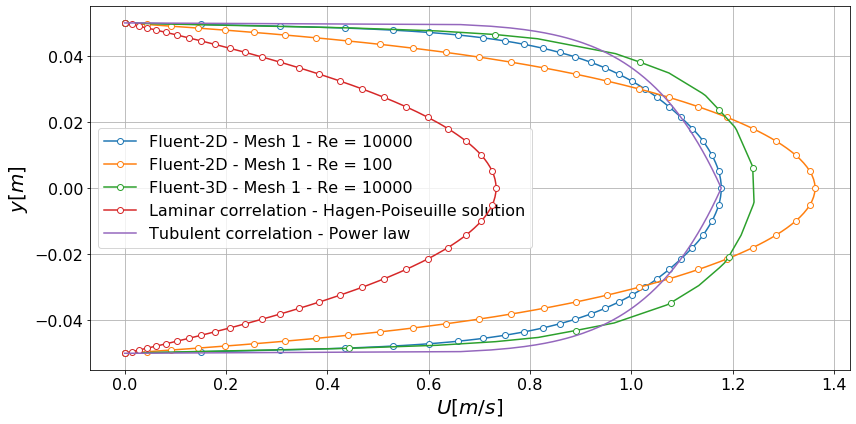

In [357]:
plt.figure(figsize=(12, 6))

plt.plot(full[:,1],full[:,0],'o-',label='Fluent-2D - Mesh 1 - Re = 10000',markerfacecolor='white',markevery=4,zorder=10)
plt.plot(full2[:,1],full2[:,0],'o-',label='Fluent-2D - Mesh 1 - Re = 100',markerfacecolor='white',markevery=4,zorder=10)
plt.plot(data31[:,1],data31[:,0],'o-',label='Fluent-3D - Mesh 1 - Re = 10000',markerfacecolor='white',markevery=4,zorder=10)
# plt.plot(full2[:,1],full2[:,0],'o-',label='Fluent-3D - Mesh 1 - Re = 100',markerfacecolor='white',markevery=4,zorder=10)

plt.plot(u,full2[:,0],'o-',label='Laminar correlation - Hagen-Poiseuille solution',markerfacecolor='white',markevery=4,zorder=10)
plt.plot (full3[:,1],full3[:,0],label= "Tubulent correlation - Power law",zorder=10)


plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$U  [m/s]$', fontsize=20)
plt.ylabel('$y [m]$', fontsize=20)

plt.tight_layout()



## 2. Plot non-dimensional velocity profile $y^+$ vs $u^+$



## Theoretical profiles
<br>
Log-law layer
<br>
<br>

<font size="5"> $u^+ = \frac{1}{\kappa} \text{ln} y^+ + C^+$ </font>

<br>
<br>

Viscous sublayer

<font size="5"> $u^+ =  y^+ $ </font>


In [339]:
#Compute theoretical profiles
x=np.linspace(0.1,100000,1000000)
yp=x

#Laminar sublayer
upl=yp

#Low-law layer
upt=(1.0/0.41)*np.log(yp)+5.0


#Compute therorical profiles with limit on values
x1=np.linspace(0.1,20,10000)
x2=np.linspace(5,100000,10000)

ypl1=x1
ypt1=x2

#Laminar sublayer
upl1=ypl1

#Low-law layer
upt1=(1.0/0.41)*np.log(ypt1)+5.0


## Spalding's law
<br>
The most widely known “universal” velocity profile is Spalding’s law [1], which is essentially a fit of the laminar, buffer and logarithmic regions of the boundary layer, 
<br>
<br>

<font size="5"> $y^+ = u^+ + \frac{1}{E} \left[e^{\kappa u^+} - 1 - \frac{\kappa u^+}{1!} - \frac{ \left( \kappa u^+ \right)^2}{2!} - \frac{ \left( \kappa u^+ \right)^3}{3!} - \frac{ \left( \kappa u^+ \right)^4}{4!} \right]$ </font>

<br>
<br>

[1] Spalding. A single formula for the law of the wall. J. of Applied Mechanics. 1961.

In [340]:
#Spalding universal law

up_s = np.linspace(0,30,10000)

#E = 9.025
#k = 0.4
#B = 5.5

E = 9.1
k = 0.42

#E = 8.6
#k = 0.417
    
yp_s = up_s + (1/E)*( np.exp(k*up_s) - 1 - (k*up_s) - ((k*up_s)**2)/2  - ((k*up_s)**3)/6 - ((k*up_s)**4)/24 )

In [361]:
#Compute y+ and u+ from numerical solution

U=1
rho=1

nu=1.e-5
wallShearStress = np.loadtxt('../postProcessing/wallShearstress',skiprows=4)
ws = max(wallShearStress[:,1])

utau = np.sqrt(ws/rho)
ypn = utau*(abs(data1[0:mid,0]-data1[0,0]))/nu
upn = data1[0:mid,1]/utau


In [369]:
#Compute y+ and u+ from numerical solution

wallShearStress = np.loadtxt('../postProcessing1/wallShearstress',skiprows=4)
ws = max(wallShearStress[:,1])
mid = 17

utau1 = np.sqrt(ws/rho)
ypn1 = utau1*(abs(data31[0:mid,0]-data31[0,0]))/nu
upn1 = data31[0:mid,1]/utau1

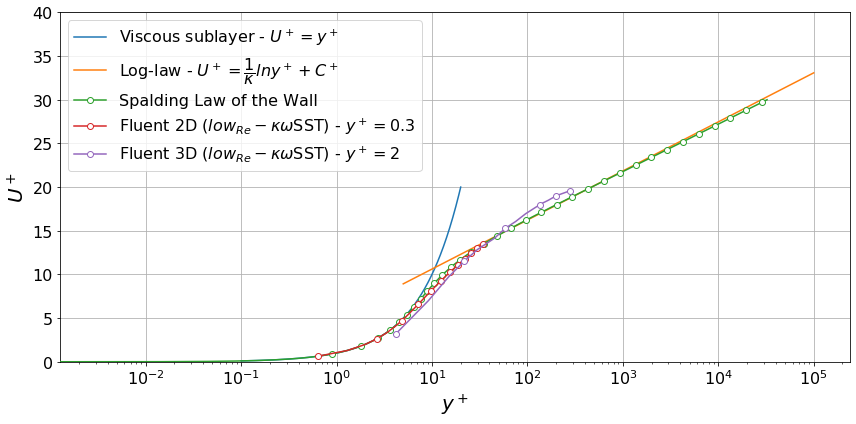

In [370]:
#Plot profiles

plt.figure(figsize=(12, 6))

#Correlations
#plt.plot(yp,upl,label='Viscous sublayer - $U^+=y^+$')
#plt.plot(yp,upt,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(ypl1,upl1,label='Viscous sublayer - $U^+=y^+$')
plt.plot(ypt1,upt1,label='Log-law - $U^+ = \dfrac{1}{\kappa} ln y^+ + C^+$')

plt.plot(yp_s,up_s,'o-',label='Spalding Law of the Wall',markerfacecolor='white',markevery=300,zorder=10)


#FLUENT solution
plt.plot(ypn[1:],upn[1:],'-o',ms=6,label='Fluent 2D ($low_{Re} - {\kappa}{\omega}$SST) - $y^+ = 0.3$',markerfacecolor='white',markevery=3,zorder=20)
plt.plot(ypn1[1:],upn1[1:],'-o',ms=6,label='Fluent 3D ($low_{Re} - {\kappa}{\omega}$SST) - $y^+ = 2$',markerfacecolor='white',markevery=3,zorder=20)

plt.xscale('log')
#plt.xlim(0,10000)
plt.ylim(0,40)

plt.grid()

plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$y^+$', fontsize=20)
plt.ylabel('$U^+$', fontsize=20)

plt.tight_layout()

#plt.savefig("figbl.png")


In [329]:
import sys
print('Python version:', sys.version_info)

import IPython
print('IPython version:', IPython.__version__)

import numpy
print('Numpy version', numpy.__version__)

import matplotlib
print('Matplotlib version:', matplotlib.__version__)


Python version: sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
IPython version: 7.12.0
Numpy version 1.18.1
Matplotlib version: 3.1.1
